# Import Dataset and Library

In [ ]:
# import dataset
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg


In [ ]:
# to chack the datasets are correctly uploaded and labeled.
import os
print(os.listdir(os.getcwd()))

['.config', '4.jpg', '3.jpg', '1.jpg', '2.jpg', 'sample_data']


In [ ]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np

# Data Cleaning and Storing

(598, 676, 3)
598 676 3


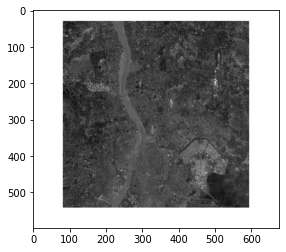

In [ ]:
# investigate one input image
img = plt.imread('1.jpg')
plt.imshow(img)
a, b, c = img.shape
print(img.shape)
print(a, b, c)
# we have to delete this white border while taking input

In [ ]:
# creating a feature vecotor with dim 512, 512, 4
# beacause, each sample is of 512*512 and 
# total 4 samples
X = np.zeros(shape=(512, 512, 4), dtype=np.int8)
print(X)

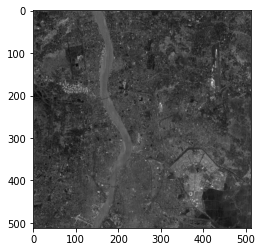

In [ ]:
# zoom image to find the cliffed coordinate 
# of image of 512*512
img1  = img[28:540, 80:592]
plt.imshow(img1)

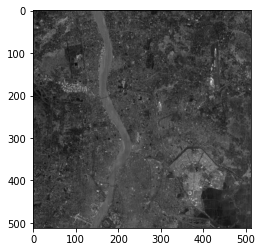

In [ ]:
img1  = img[30:542, 82:594]
plt.imshow(img1)

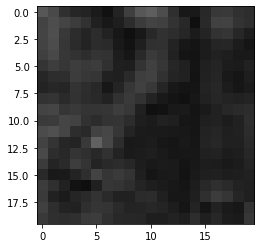

In [ ]:
# magnify to see if white border
# cliffed correctly at edge
plt.imshow(img1[0:20, 0:20])

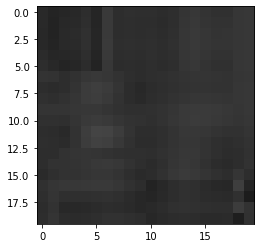

In [ ]:
plt.imshow(img1[492:512, 492:512])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


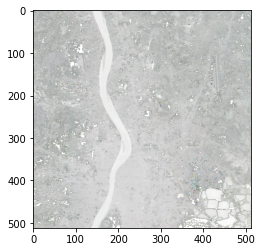

In [ ]:
# storing input images to X
for i in range(4):
  ig = plt.imread(str(i+1)+'.jpg')[30:542, 82:594]
  print(ig.shape)
  # plt.imshow(ig)
  X[:, :, i] = np.array(ig[:, :, 0])

plt.imshow(X)
# X is our feature vector

# Extraction of Test Coordinates

---



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


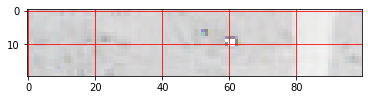

In [ ]:
X1 = X[400:420, 100:200, :]
plt.imshow(X1)
plt.grid(b=True, color='r')

In [ ]:
# 50 river coordinates for test sample
coord_x_r = [140, 150, 158, 158, 160, 170, 175, 179, 179, 182, 173, 175, 160, 160, 176, 170, 155, 157,
            160, 160, 160, 182, 180, 185, 180, 190, 200, 200, 212, 210, 212, 220, 220, 220, 200, 210,
            200, 190, 185, 183, 180, 185, 185, 165, 180, 159, 160, 160, 160, 150]
coord_y_r = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190,
            200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370,
            380, 390, 400, 410, 420, 430, 440, 450, 460, 462, 480, 490]
print(len(coord_x_r))
print(len(coord_y_r))
# 100 non-river coordinates for test sample
coord_x_nr = [0, 25, 50, 75, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475,
             0, 25, 50, 75, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475,
             0, 25, 50, 75, 300, 325, 350, 375, 400, 425, 450, 475,
             0, 25, 50, 75, 300, 325, 350, 375, 400, 425, 450, 475,
             0, 25, 50, 75, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475,
             110, 120, 140, 180,
             100, 120, 140, 180,
             100, 120, 140, 158, 270, 240, 280, 240,
             120, 140, 120, 125, 275, 240, 260, 292,
             180, 190, 185, 195]
coord_y_nr = [0, 25, 50, 75, 0, 25, 50, 75, 0, 25, 50, 75, 0, 25, 50, 75,
             100, 125, 150, 175, 100, 125, 150, 175, 100, 125, 150, 175, 100, 125, 150, 175,
             200, 225, 250, 275, 200, 225, 250, 275, 200, 225, 250, 275,
             300, 325, 350, 375, 300, 325, 350, 375, 300, 325, 350, 375,
             400, 425, 450, 475, 400, 425, 450, 475, 400, 425, 450, 475, 400, 425, 450, 475,
             95, 40, 40, 20,
             120, 140, 160, 180,
             260, 260, 265, 265, 240, 240, 220, 200,
             310, 335, 360, 360, 320, 330, 380, 370,
             480, 485, 490, 495]
print(len(coord_x_nr))
print(len(coord_y_nr))

50
50
100
100


In [ ]:
# for i in range(50):
#   print(i, X[coord_x_r[i], coord_y_r[i], 1])

# Implementation process of Density Function 
Refered from documentation provided 

## Step 1: Calculate mean of river class
Calculate Mean of River Class : mean_r = [Mean1; Mean2; Mean3 ;Mean4]

*   Mean1 = mean of Rband image for 50 sample points
*   Mean2 = mean of Gband Image for 50 sample points
*   Mean3 = mean of Bband image for 50 sample points
*   Mean4 = mean of Iband image for 50 sample points

In [ ]:
mean_r = [0]*4
print(mean_r)

for i in range(4):
  for j in range(50):
    mean_r[i] = mean_r[i] + X[coord_x_r[j], coord_y_r[j], i]

print(mean_r)
for j in range(4):
  mean_r[j] = mean_r[j] / 50
print(mean_r)

[0, 0, 0, 0]
[3170, 3435, 3100, 3691]
[63.4, 68.7, 62.0, 73.82]


## Step 2 : Mean of Non River Class
 Calculate Mean of NonRiver Class : mean_nr = [Mean1; Mean2; Mean3; Mean4];
*   Mean1 = mean of Rband image for 100 sample points
*   Mean2 = mean of Gband Image for 100 sample points
*   Mean3 = mean of Bband image for 100 sample points
*   Mean4 = mean of Iband image for 100 sample points

In [ ]:
mean_nr = [0]*4
print(mean_nr)

for i in range(4):
  for j in range(100):
    mean_nr[i] = mean_nr[i] + X[coord_x_nr[j], coord_y_nr[j], i]

print(mean_nr)
for j in range(4):
  mean_nr[j] = mean_nr[j] / 100
print(mean_nr)

[0, 0, 0, 0]
[6520, 7078, 6693, 7819]
[65.2, 70.78, 66.93, 78.19]


## Step 3: Covariance mat for River Class
 Calculate the Covariance Matrix for River Class for 50 samples which is 4 * 4
dimensions. Basically (X – T1) deviation and (Y – T1) deviation and multiply it and summing up
where X and Y represents all the sample points considered for training ( R, G, B and I band
image) we will get 2^4 = 16 values in the covariance matrix for possible combinations of 4 band
images. We are doing the deviation of sample points from the mean vector.
(Apply covariance matrix calculation formula)

In [ ]:
cov_r = np.zeros(shape=(4, 4), dtype=np.float64)

dev_r = np.zeros(shape=(50,4), dtype=np.float64)

for i in range(50):
  dev_r[i] = np.subtract(X[coord_x_r[i],coord_y_r[i],:], mean_r)

# print(dev_r)

for i in range(4):
  for j in range(4):
    cov_r[i][j] = np.dot(dev_r[:, i], dev_r[:, j]) / 50

print(cov_r)

[[ 230.12    191.58    216.38     63.812 ]
 [ 191.58    203.65    218.14     82.126 ]
 [ 216.38    218.14    306.72    184.98  ]
 [  63.812    82.126   184.98   1167.6276]]


## Step 4: Covariance Matrix for Non River Class
 for 100 samples which is 4 * 4
dimensions also by applying same process explained in step 3. 

In [ ]:
dev_nr = np.zeros(shape=(100, 4), dtype=np.float64)
cov_nr = np.zeros(shape=(4, 4), dtype=np.float64)

for i in range(100):
  dev_nr[i] = np.subtract(X[coord_x_nr[i],coord_y_nr[i],:], mean_nr)

for i in range(4):
  for j in range(4):
    cov_nr[i][j] = np.dot(dev_nr[:, i], dev_nr[:, j]) / 100

print(cov_nr)

[[337.     296.074  288.914  103.432 ]
 [296.074  322.0716 292.5846 176.3018]
 [288.914  292.5846 369.8051 149.4133]
 [103.432  176.3018 149.4133 645.6939]]


## Step 5: Probability Density using Bayes

In [ ]:
# inverse of Covariance matrices
inv_cov_r = np.linalg.inv(cov_r)
inv_cov_nr = np.linalg.inv(cov_nr)

# Determinant of Covariance matrices
det_cov_r = np.linalg.det(cov_r)
det_cov_nr = np.linalg.det(cov_nr)

# square root of pre computed determinant matrices
sqrt_det_r = np.sqrt(det_cov_r)
sqrt_det_nr = np.sqrt(det_cov_nr)

In [ ]:
def bayes_prob(i, j):
  riv_class = np.subtract(X[i, j, :], mean_r)
  nriv_class = np.subtract(X[i, j, :], mean_nr)

  riv_cal = np.dot(np.dot(riv_class.T, inv_cov_r), riv_class)
  nriv_cal = np.dot(np.dot(nriv_class.T, inv_cov_nr), nriv_class)

  p1 = (-0.5)*(1/sqrt_det_r)*(np.exp(riv_cal))
  p2 = (-0.5)*(1/sqrt_det_nr)*(np.exp(nriv_cal))

  return p1, p2

In [ ]:
def bayes_th(P1, P2):
  img = np.zeros(shape=(512, 512), dtype=np.int8)

  for i in range(512):
    for j in range(512):
      p1, p2 = bayes_prob(i, j)
      if((p1 * P1) >= (p2 * P2)):
        img[i, j] = 255
      else:
        img[i, j] = 0
  
  plt.imshow(img, cmap='gray')
  return

## Step 6: Testing output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


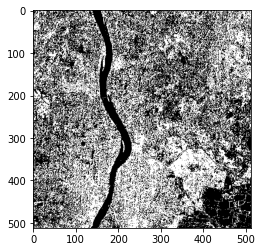

In [ ]:
bayes_th(0.3, 0.7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


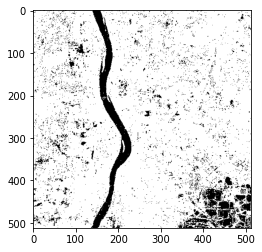

In [ ]:
bayes_th(0.7, 0.3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


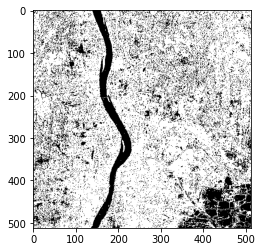

In [ ]:
bayes_th(0.5, 0.5)